***
Welcome! 
<br>
<br>
<br>
In this notebook, we are going to pick up pre-trained word vectors and visualize word similarities using a techique called Principal Component Analysis.
<br>
<br>
We will use the `gensim` library to load some pre-trained word embeddings - these are comparable to the ones we have developed ourselves using the wikipedia data but pre-trained on gigabytes of data.
***

In [1]:
from gensim.models import Word2Vec
import numpy as np
import matplotlib.pyplot as plt
import seaborn

The following code will download around 2GB of data.
<br>
<br>
The vectors that we are going to load were trained on Google News. The model contains 300-dimensional vectors (number of nodes in the hidden layer) for 3 million words and phrases.

In [2]:
import gensim.downloader as api
word2vec_model = api.load('word2vec-google-news-300')

**Let's check some vocab from this pre-trained model:**

In [3]:
word2vec_model.index_to_key[0:25]

['</s>',
 'in',
 'for',
 'that',
 'is',
 'on',
 '##',
 'The',
 'with',
 'said',
 'was',
 'the',
 'at',
 'not',
 'as',
 'it',
 'be',
 'from',
 'by',
 'are',
 'I',
 'have',
 'he',
 'will',
 'has']

In [4]:
len(word2vec_model.index_to_key)

3000000

The vocab of the model contains 3 million words, each one attached to a single word embedding. Let's visualize one of them:

Let's get the vector for the word 'Nation':

In [5]:
vec_nation = word2vec_model['nation']

It is a huge vector with 300 values:

In [6]:
vec_nation

array([-1.27929688e-01,  1.41601562e-01,  2.69531250e-01,  2.81250000e-01,
        5.90820312e-02, -2.05078125e-01, -6.25000000e-02, -7.42187500e-02,
        1.40625000e-01,  4.19921875e-02, -7.95898438e-02, -1.03515625e-01,
        3.35937500e-01,  6.93359375e-02,  1.12304688e-02,  1.69921875e-01,
       -2.01171875e-01,  1.47460938e-01, -1.45263672e-02,  1.10839844e-01,
        3.05175781e-02, -9.03320312e-02,  1.10473633e-02, -6.15234375e-02,
        4.29687500e-02,  5.44433594e-02, -2.22656250e-01, -7.27539062e-02,
       -4.22363281e-02, -8.20312500e-02,  1.36718750e-01, -8.74023438e-02,
       -1.28906250e-01, -3.54003906e-02,  1.97265625e-01,  1.18164062e-01,
        1.99890137e-03, -1.56250000e-01,  4.95605469e-02,  3.33984375e-01,
       -8.74023438e-02, -8.64257812e-02,  1.08398438e-01,  1.34765625e-01,
        1.53320312e-01,  2.04101562e-01, -5.83496094e-02,  1.27929688e-01,
       -1.38671875e-01,  8.78906250e-02,  1.20605469e-01,  8.98437500e-02,
        6.59179688e-02,  

Recall that the 300 is the number of nodes in the hidden layer that was used in this pre-trained model. How do we know that? **Because the shape of our arrays match the number of nodes in the hidden layer of our neural network!**

Let's see some similarity between words - starting with America and Europe by calling the `word2vec_model.similarity` method:

In [7]:
word2vec_model.similarity('america', 'europe')

0.6617692

What about political and economic systems and a respective country?

In [8]:
print(word2vec_model.similarity('capitalism', 'russia'))
print(word2vec_model.similarity('communism', 'russia'))

0.21713962
0.27537563


In [9]:
print(word2vec_model.similarity('capitalism', 'america'))
print(word2vec_model.similarity('communism', 'america'))

0.23685329
0.1949246


More interesting examples - using other fields such as cinema or informatics:

In [12]:
print(word2vec_model.similarity('leonardo', 'oscars'))
print(word2vec_model.similarity('ben', 'oscars'))

0.4673068
0.2489389


In [13]:
print(word2vec_model.similarity('apple', 'mac'))
print(word2vec_model.similarity('apple', 'pc'))

0.24305128
0.18610561


One of the most interesting examples we can do using word vectors is the possibility of finding representation of meaning with the following equation:
<br>
$ v^{king} + v^{woman} - v^{man}   \approx v^{queen} $


The following calculation means that if we pick the vector of `king`, sum the vector of `woman` and subtract the vector of `man` we will obtain a vector that will be similar to the vector of `queen`:

In [32]:
word2vec_model['king']+word2vec_model['woman']-word2vec_model['man']

array([ 4.29687500e-02, -1.78222656e-01, -1.29089355e-01,  1.15234375e-01,
        2.68554688e-03, -1.02294922e-01,  1.95800781e-01, -1.79504395e-01,
        1.95312500e-02,  4.09919739e-01, -3.68164062e-01, -3.96484375e-01,
       -1.56738281e-01,  1.46484375e-03, -9.30175781e-02, -1.16455078e-01,
       -5.51757812e-02, -1.07574463e-01,  7.91015625e-02,  1.98974609e-01,
        2.38525391e-01,  6.34002686e-02, -2.17285156e-02,  0.00000000e+00,
        4.72412109e-02, -2.17773438e-01, -3.44726562e-01,  6.37207031e-02,
        3.16406250e-01, -1.97631836e-01,  8.59375000e-02, -8.11767578e-02,
       -3.71093750e-02,  3.15551758e-01, -3.41796875e-01, -4.68750000e-02,
        9.76562500e-02,  8.39843750e-02, -9.71679688e-02,  5.17578125e-02,
       -5.00488281e-02, -2.20947266e-01,  2.29492188e-01,  1.26403809e-01,
        2.49023438e-01,  2.09960938e-02, -1.09863281e-01,  5.81054688e-02,
       -3.35693359e-02,  1.29577637e-01,  2.41699219e-02,  3.48129272e-02,
       -2.60009766e-01,  

If you search for the highest cosine similarity on our base for this resulting vector, you would get the vector `queen` as first (although this only happens because the vectors that belong to the calculation are excluded, in reality the vector king would be the most similar one).
<br>
<br>
<br>
Instead of doing an extensive search of similarities throughout the entire 3 million cosine similarities that we could find - `gensim` models already have a cool implementation for us to do that, using the `positive` and `negative` arguments in the `most_similar` method:

In [14]:
queens_vector = word2vec_model.most_similar(
    positive=['king', 'woman'],
    negative=['man']
)

In [15]:
queens_vector

[('queen', 0.7118193507194519),
 ('monarch', 0.6189674139022827),
 ('princess', 0.5902431011199951),
 ('crown_prince', 0.5499460697174072),
 ('prince', 0.5377321839332581),
 ('kings', 0.5236844420433044),
 ('Queen_Consort', 0.5235945582389832),
 ('queens', 0.5181134343147278),
 ('sultan', 0.5098593831062317),
 ('monarchy', 0.5087411999702454)]

The most similar vectors when we compare with this example are queen, monarch and princess. Let's see more equations like these and see if they make sense - these types of equations are normally refered as `analogies`:

In [16]:
capital_vector = word2vec_model.most_similar(
    positive=['spain', 'england'],
    negative=['london']
)

In [17]:
capital_vector

[('madrid', 0.630977213382721),
 ('ronaldo', 0.627199113368988),
 ('portugal', 0.5919548869132996),
 ('italy', 0.5803670287132263),
 ('messi', 0.5725723505020142),
 ('real_madrid', 0.5712533593177795),
 ('juve', 0.5686383247375488),
 ('rooney', 0.5678940415382385),
 ('drogba', 0.5677210688591003),
 ('gerrard', 0.5676171779632568)]

In [18]:
word2vec_model.most_similar(
    positive=['messi', 'real_madrid']
)

[('ronaldo', 0.8425754904747009),
 ('drogba', 0.8401825428009033),
 ('madrid', 0.8336018323898315),
 ('man_utd', 0.8262578845024109),
 ('ronaldinho', 0.825080931186676),
 ('barca', 0.8210373520851135),
 ('juventus', 0.8209236264228821),
 ('barcelona', 0.8197412490844727),
 ('mourinho', 0.8197077512741089),
 ("eto'o", 0.8152968883514404)]

In [40]:
word2vec_model.most_similar(
    positive=['lakers', 'cleveland'],
    negative=['los_angeles']
)

[('cavs', 0.5942688584327698),
 ('mavs', 0.5828205347061157),
 ('celtics', 0.5777897238731384),
 ('laker', 0.5514701008796692),
 ('TWolves', 0.5313504338264465),
 ('DWade', 0.5292848348617554),
 ('lebron', 0.5235141515731812),
 ('kobe', 0.5173141360282898),
 ('DWill', 0.509246289730072),
 ('gasol', 0.5078444480895996)]

Similarly to how we extracted the `topn` similar words in our `wikipedia` text, we can also do that in `most_similar` in `word2vec`:

In [41]:
word2vec_model.most_similar(positive=['car'], topn=10)

[('vehicle', 0.7821096181869507),
 ('cars', 0.7423831224441528),
 ('SUV', 0.7160962224006653),
 ('minivan', 0.6907036900520325),
 ('truck', 0.6735789775848389),
 ('Car', 0.6677608489990234),
 ('Ford_Focus', 0.667320191860199),
 ('Honda_Civic', 0.6626849174499512),
 ('Jeep', 0.651133120059967),
 ('pickup_truck', 0.6441438794136047)]

In `word2vec`, we can also check the least similar words (with this training data, they are not super meaningful):

In [44]:
word2vec_model.most_similar(negative=['portugal'], topn=5)

[('tells_Daily_RFT', 0.29403257369995117),
 ('Nimo_Hussein', 0.29146602749824524),
 ('Burkholz', 0.289093554019928),
 ('Patrick_Charmel', 0.27955397963523865),
 ('FOUNTAIN_INN', 0.27724912762641907)]

In [45]:
word2vec_model.most_similar(negative=['sun'], topn=5)

[('e_mail_sports@tylerpaper.com', 0.2564525008201599),
 ('magnetic_stripe_EMV', 0.2439906746149063),
 ('edbrice@star-telegram.com', 0.23484541475772858),
 ('CONFERENCE_CALL_TODAY', 0.22490572929382324),
 ('Board_CMTX', 0.22121602296829224)]

**Let's visualize our word vectors using a technique called PCA (Principal Component Analysis) (that crunches vectors in to $n$ dimensions).**

In [46]:
from sklearn.decomposition import PCA

Let's select two vectors - the vector for *car* and *banana*:

In [47]:
X = [
    word2vec_model['car'],
    word2vec_model['banana']
]

We will fit a `PCA` on this data - don't worry about it too much, just know that we are crunching our vectors into 2 dimensions so that we can visualize them on a 2D plot.

In [48]:
pca = PCA(n_components=2)
array_plot = pca.fit_transform(X)

In [49]:
vectors = ['car','banana']

In [50]:
def plot_array_vectors_points(word_emb, vectors_name):
    fig, ax = plt.subplots()
    ax.scatter(word_emb[:,0],word_emb[:, 1])
    ax.grid(True, which='both')
    seaborn.despine(ax=ax, offset=0)
    plt.title('Vector Representation as Points');

    for i, txt in enumerate(vectors_name):
        ax.annotate(
            txt,
            (word_emb[i,0], word_emb[i,1]),
            bbox=dict(boxstyle="round", fc="w")
        )

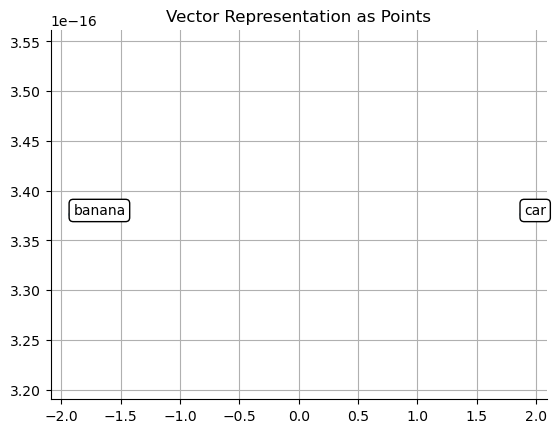

In [51]:
plot_array_vectors_points(array_plot, vectors)

Let's see how `word2vec` groups these vectors together:

In [52]:
X = np.vstack([word2vec_model['car'], word2vec_model['SUV'] , word2vec_model['banana'],
              word2vec_model['apple'] , word2vec_model['pear'], word2vec_model['Jeep'],
              word2vec_model['magic']])
array_plot_2 = pca.fit_transform(X)
vectors = ['car','SUV','banana','apple','pear','Jeep','magic']

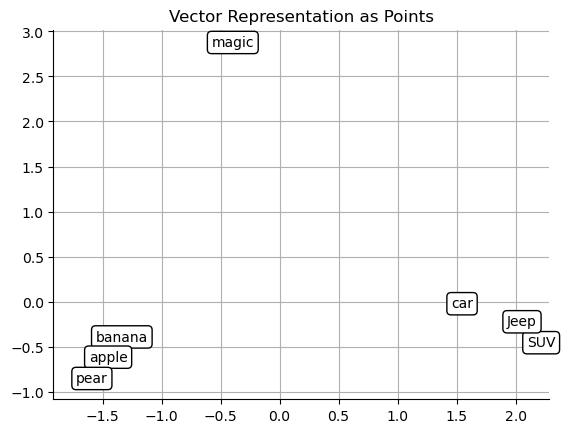

In [53]:
plot_array_vectors_points(array_plot_2, vectors)

In conclusion, this notebook presented an exploration of Word2Vec, a powerful, pretrained model for generating word embeddings. 
<br>
<br>
Through this journey, we gained insights into the semantic and syntactic relationships among words, effectively visualized in high-dimensional vector spaces. It's important to note that while Word2Vec provides valuable results, it has its limitations and peculiarities, such as the unpredictability of 'least similar' words. 
<br>
<br>
Now, it's time to practice using Python!